In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import scipy.optimize as opt
from scipy.optimize import curve_fit
import spinmob as s
# import os 
# os.chdir('C:\\Users\\joeyb\\Documents\\Physics 359\\Hall')

In [2]:
mv = (np.loadtxt('all_the_mv.csv', delimiter=',', skiprows = 1))

In [3]:
result = []
for sublist in mv:
    for item in sublist:
        result.append(item)
#print("\nCollapse nested lists:")
final_result = np.transpose(result)
# print(final_result)

TempArray = np.linspace(-270, 399, 670)

### Temp vs Voltage

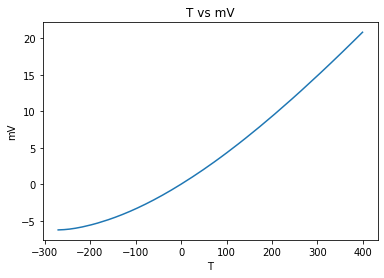

In [4]:
plt.plot(TempArray, final_result)
plt.title("T vs mV")
plt.xlabel('T')
plt.ylabel('mV')
plt.show()

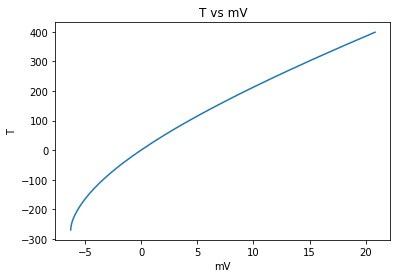

In [5]:
plt.plot(final_result, TempArray)
plt.title("T vs mV")
plt.xlabel('mV')
plt.ylabel('T')
plt.show()

### Trying with just taking linear approx on small scales

In [49]:
#splitting arrays in to 10 element arrays
mVArraysOf10 = np.split(final_result, len(final_result)/10)
TArraysOf10 = np.split(TempArray, len(final_result)/10)

for i in range(0, len(mVArraysOf10)):
    if (i != len(mVArraysOf10) - 1):
        mVArraysOf10[i] = np.append(mVArraysOf10[i], mVArraysOf10[i+1][0])
        TArraysOf10[i] = np.append(TArraysOf10[i], TArraysOf10[i+1][0])

    else:
        mVArraysOf10[i] = np.append(mVArraysOf10[i], mVArraysOf10[i-1][-1])
        TArraysOf10[i]= np.append(TArraysOf10[i], TArraysOf10[i-1][-1])


#get linear fit for each array of 10
fits = []

for i in range(0, int(len(final_result)/10)):
#     print(TimeArray[i])
    fits.append(curve_fit(linear, mVArraysOf10[i], TArraysOf10[i]))

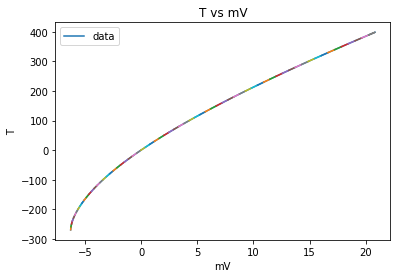

In [50]:
#plotting fits to make sure they match the data

plt.plot(final_result, TempArray, label="data")
plt.title("T vs mV")
plt.xlabel('mV')
plt.ylabel('T')
plt.legend()

for i in range(0, len(fits)):
    plt.plot(mVArraysOf10[i], linear(mVArraysOf10[i], fits[i][0][0], fits[i][0][1]))

plt.show()

In [51]:
def linear(V, m, b):
    return m*V + b

"""
Takes input voltage (mV) and outputs corresponding temperature (C)
Must be run with mVArraysOf10[] and fits[]
"""
def getTempFromVolt(V):
    fitted = False
    index = 0

    while fitted == False:
    #     print(min(mVArraysOf10[index]), (max(mVArraysOf10[index])) )
        if (min(mVArraysOf10[index]) <= V <= (max(mVArraysOf10[index])) ):
            TempVal = linear(V, fits[index][0][0], fits[index][0][1])
            fitted = True
        index+=1
        if index == len(fits):
            print("Error, Voltage not found.")
            TempVal = 0
            break
    
    return TempVal
    

In [86]:
# Use function to get temp for a given V
V = 
Temp = getTempFromVolt(V)
            
print(Temp)

Error, Voltage not found.
0


In [53]:
friTry = (np.loadtxt('2020-02-07 13_35 Voltage Readings Data_stopped15_05.csv', delimiter=',', skiprows = 1))
friTry = np.transpose(friTry)

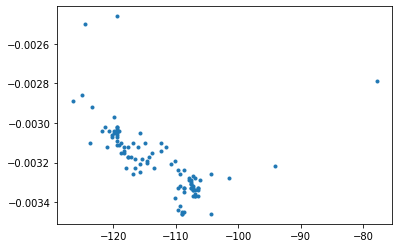

In [93]:
#data is actually in V not mV
# print(friTry[7][0]*1e3)s
tempfriData = [getTempFromVolt(V) for V in friTry[7]*1e3]

plt.plot(tempfriData[0:100], friTry[0][0:100], ls=" ", marker=".")
plt.show()

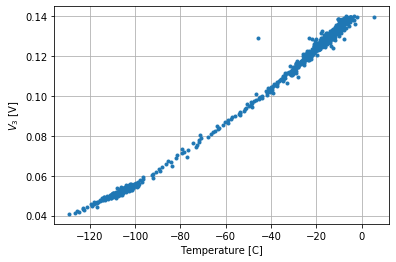

In [82]:
#plotting V4 vs temp to get big resistance as V=IR 

data = np.transpose((np.loadtxt('2020-02-10 13_41 Voltage Readings Data_try1.csv', delimiter=',', skiprows = 1)))
tempdata = [getTempFromVolt(V) for V in data[7]*1e3]

plt.plot(tempdata, data[2], ls=" ", marker=".")

plt.grid()
plt.ylabel("$V_3$ [V]")
plt.xlabel("Temperature [C]")

plt.show()

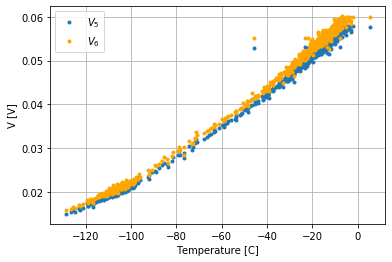

In [104]:
#plotting V5 and V6 vs temp to get better small resistance as V=IR 

data = np.transpose((np.loadtxt('2020-02-10 13_41 Voltage Readings Data_try1.csv', delimiter=',', skiprows = 1)))
tempdata = [getTempFromVolt(V) for V in data[7]*1e3]

plt.plot(tempdata, data[4], ls=" ", marker=".", label="$V_5$")
plt.plot(tempdata, data[5], ls=" ", marker=".", color="orange", label="$V_6$")

plt.grid()
plt.ylabel("V [V]")
plt.xlabel("Temperature [C]")
plt.legend()

plt.show()

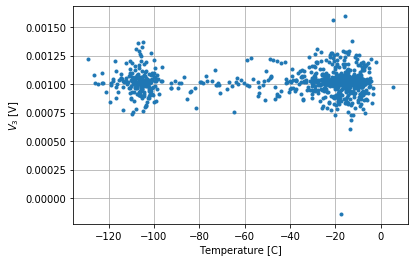

In [83]:
# I = V4/R, just for checking the current is actually 1 mA
#seems flat as expected

plt.plot(tempdata, data[3], ls=" ", marker=".")

plt.grid()
plt.ylabel("$V_4$ [V]")
plt.xlabel("Temperature [C]")

plt.show()